<h2>Poshem Business School Sales Project<h2> 

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [82]:
sales_df = pd.read_csv("poshem_business_school_sales.csv")
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<h3>EDA Overview Answers<h3>

1. Waht is the Timeframe of the dataset (Start and end date)

In [83]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], dayfirst=True, format='%d/%m/%Y')
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'], dayfirst=True, format='%d/%m/%Y')
start_date = sales_df['Order Date'].min()
end_date = sales_df['Order Date'].max()

print(f"Dataset Timeframe:\nStart Date: {start_date.strftime(format ='%d/%m/%Y')}\nEnd Date: {end_date.strftime(format ='%d/%m/%Y')}\nDuration: {(end_date - start_date).days} days")

Dataset Timeframe:
Start Date: 03/01/2015
End Date: 30/12/2018
Duration: 1457 days


2. How many rows and columns are there in the dataset?

In [84]:
print(f"Dataset Shape:\nNumber of rows: {sales_df.shape[0]} rows\nNumber of columns: {sales_df.shape[1]} columns.")

Dataset Shape:
Number of rows: 9800 rows
Number of columns: 18 columns.


3. Are there missing values?

In [85]:
missing_values = sales_df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])
print(f"\nTotal Missing Values: {missing_values.sum()}")

Missing Values in Each Column:
Postal Code    11
dtype: int64

Total Missing Values: 11


In [86]:
#assign 5401 which is the the correct postal code for Burlington to the missing values
sales_df.loc[(sales_df['City'] == 'Burlington') & (sales_df['State'] == 'Vermont'), 'Postal Code'] = 5401
sales_df['Postal Code'] = sales_df['Postal Code'].astype('int64') #convert to integer
print(f"Missing Postal Codes: {sales_df['Postal Code'].isnull().sum()}")

Missing Postal Codes: 0


4. Data types of each column

In [87]:
print(f"Column Datatypes: \n{sales_df.dtypes}")

Column Datatypes: 
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


5. Duplicates Check

In [88]:
duplicates = sales_df.duplicated().sum()

if duplicates > 0:
    print(f"Duplicate Rows: \n{duplicates}")
else:
    print(f"No duplicates in the dataset.")

No duplicates in the dataset.


6. A quick statistical description of numerical contents in the dataset.

In [89]:
print("Statistical Summary of Numerical Columns:")
sales_df.describe()

Statistical Summary of Numerical Columns:


,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9800.000000,9800,9800,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55217.343265,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,57551.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,NaN,32066.750532,626.651875


<h3>Order Statistics<h3>

1. How many unique orders are there in the dataset?

In [90]:
print(f"Number of Unique Orders: {sales_df['Order ID'].nunique()} orders.")

Number of Unique Orders: 4922 orders.


2. What is the distribution of order statuses (e.g., delivered, pending)?

**NOTE:** This dataset does not contain an order status column, so this question cannot be answered with the available data.

3. How many unique Customers are there?

In [91]:
print(f"Number of Unique Customers: {sales_df['Customer Name'].nunique()} customers.")

Number of Unique Customers: 793 customers.


<h3>Geographical Insights<h3>

1. Which countries are included in the dataset?

In [92]:
countries = sales_df['Country'].unique()
print(f'Countries in the dataset: {countries}')
print(f'Number of Countries: {len(countries)}')

Countries in the dataset: ['United States']
Number of Countries: 1


2. What is the distribution of orders across different regions?

The Distribution of Orders across different regions: 
Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64


C:\Users\Hp\AppData\Local\Temp\ipykernel_9672\4154720366.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = region_distribution.index, y = region_distribution.values, palette='viridis')


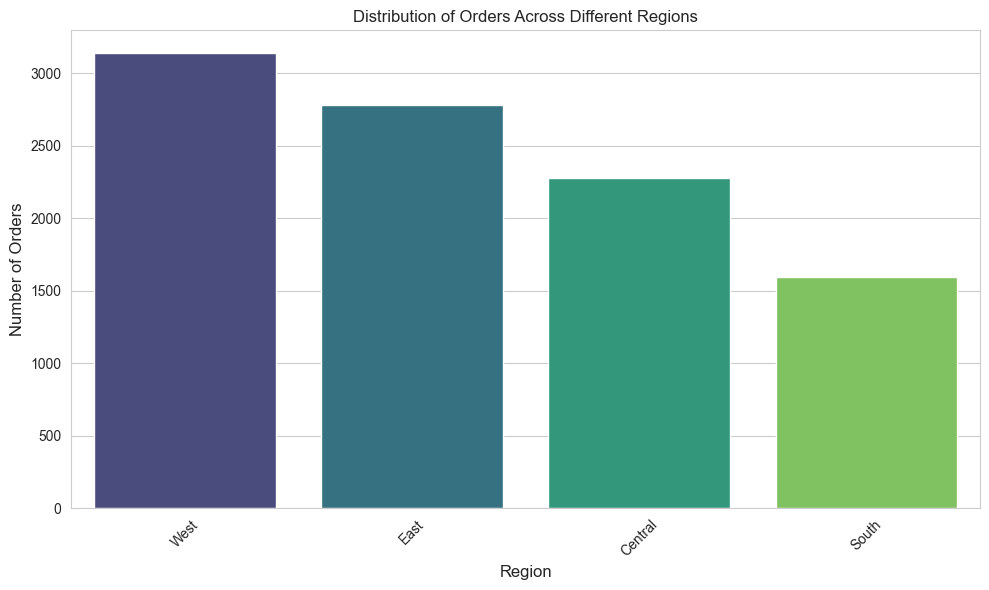

In [93]:
region_distribution = sales_df['Region'].value_counts()
print(f'The Distribution of Orders across different regions: \n{region_distribution}')

plt.title("Distribution of Orders Across Different Regions")
sns.barplot(x = region_distribution.index, y = region_distribution.values, palette='viridis')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. The top 5 cities with the highest number of orders?

Top 5 cities with the highest number of orders: 
City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Name: count, dtype: int64


C:\Users\Hp\AppData\Local\Temp\ipykernel_9672\1091700988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_5_cities.index, y = top_5_cities.values, palette='rocket')


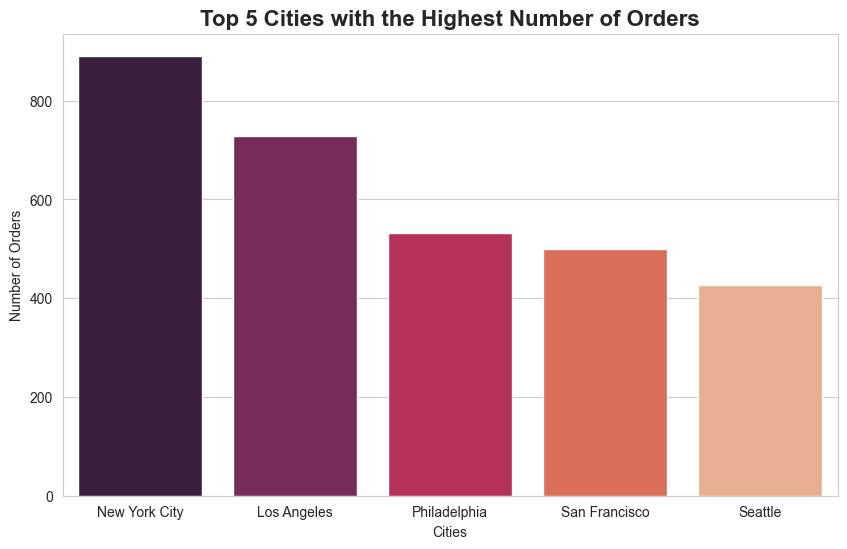

In [94]:
top_5_cities = sales_df['City'].value_counts().head(5)
print(f'Top 5 cities with the highest number of orders: \n{top_5_cities}')

plt.title("Top 5 Cities with the Highest Number of Orders", fontsize=16, fontweight='bold')
sns.barplot(x = top_5_cities.index, y = top_5_cities.values, palette='rocket')
plt.xlabel("Cities")
plt.ylabel("Number of Orders")
plt.show()

<h3>Product categories<h3>

1. How many unique product categories are there?

In [95]:
print(f"Number of Unique Categories in the Dataset: {sales_df['Category'].nunique()}\nCategories: {sales_df['Category'].unique()}")

Number of Unique Categories in the Dataset: 3
Categories: ['Furniture' 'Office Supplies' 'Technology']


2. The most popular product categories based on sales

Total Sales by Category:
Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_9672\2126848657.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


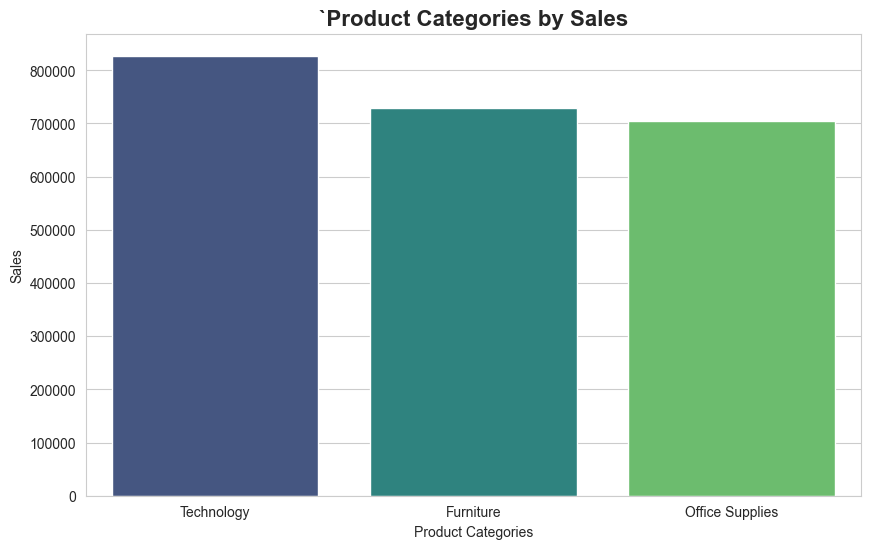

In [96]:
category_sales = sales_df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by Category:")
print(category_sales)

plt.title("`Product Categories by Sales", fontsize=16, fontweight='bold')
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.xlabel("Product Categories")
plt.ylabel("Sales")
plt.show()

3. Identify the top 5 selling products

Top 5 Products by Sale: Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_9672\3620940831.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='rocket')


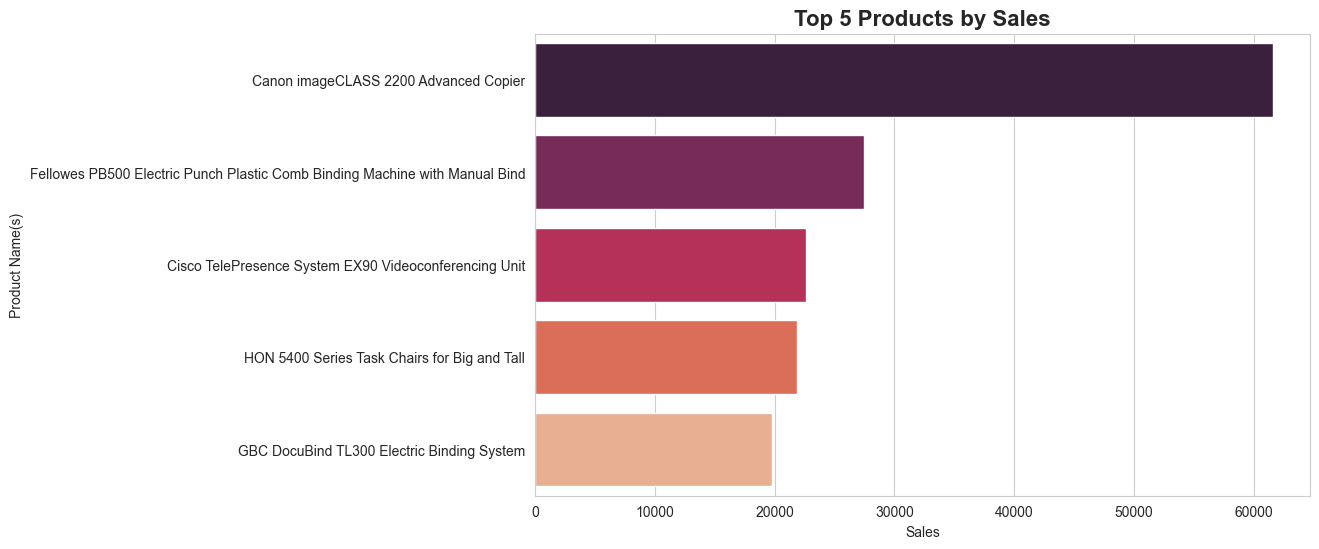

In [97]:
product_sales = sales_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
print(f'Top 5 Products by Sale: {product_sales}')

plt.title("Top 5 Products by Sales", fontsize=16, fontweight='bold')
plt.xlabel("Sales")
plt.ylabel("Product Name(s)")
sns.barplot(x=product_sales.values, y=product_sales.index, palette='rocket')
plt.show()

<h3>Customer Segmentation

1. How are customers segmented based on the "Segment" column

Customer Segments Distribution: 
Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


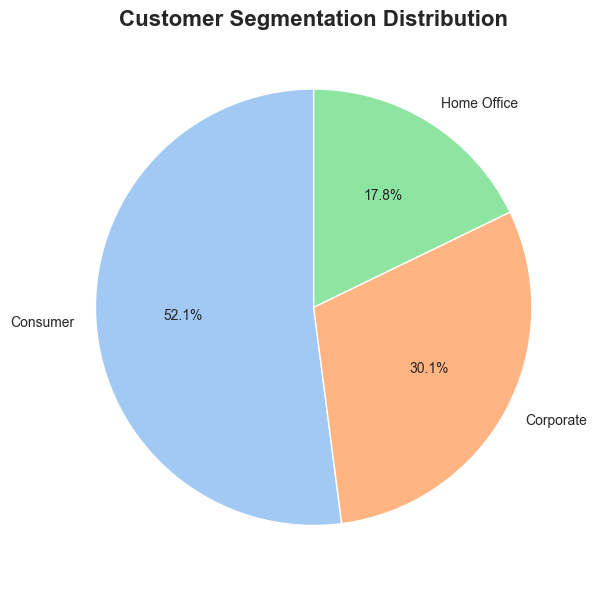

In [98]:
customers_seg = sales_df.Segment.value_counts()
print(f"Customer Segments Distribution: \n{customers_seg}")

plt.pie(customers_seg.values, labels=customers_seg.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Customer Segmentation Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

2. What is the average order value for each customer segment

Average Order Value by Customer Segment:
Segment
Home Office    243.403309
Corporate      233.150720
Consumer       225.065777
Name: Sales, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_9672\1229301669.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_order_value.index, y=avg_order_value.values, palette='Set2')


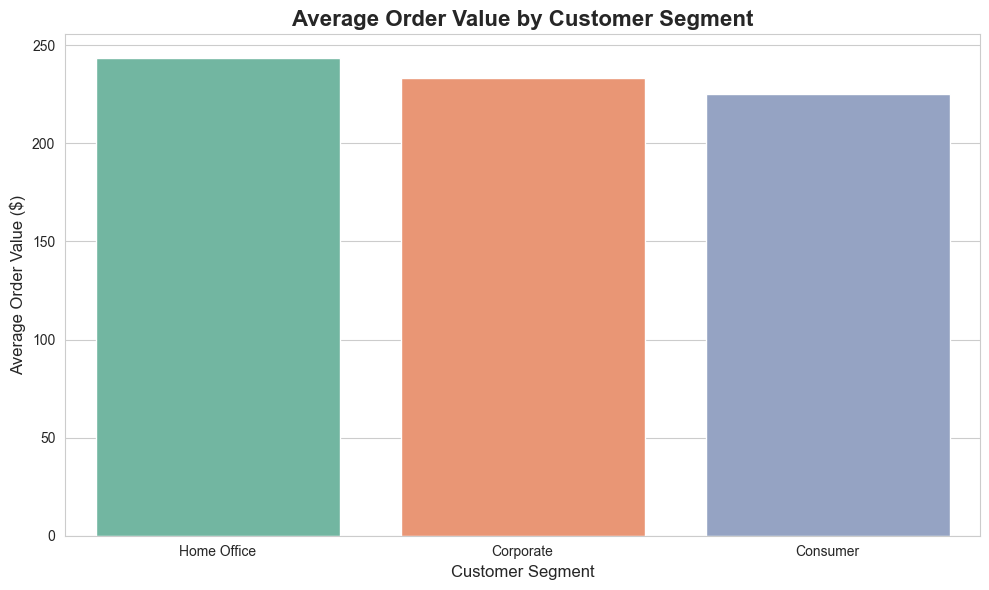

In [99]:
avg_order_value = sales_df.groupby('Segment')['Sales'].mean().sort_values(ascending=False)
print("Average Order Value by Customer Segment:")
print(avg_order_value)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_order_value.index, y=avg_order_value.values, palette='Set2')
plt.title('Average Order Value by Customer Segment', fontsize=16, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average Order Value ($)', fontsize=12)
plt.tight_layout()
plt.show()

<h3>Shipping Insights<h3>

1. What are the different shipping modes available?

In [100]:
print(f"Number of Shipping Mode: {sales_df['Ship Mode'].nunique()}\nShipping Modes: {sales_df['Ship Mode'].unique()}")

Number of Shipping Mode: 4
Shipping Modes: ['Second Class' 'Standard Class' 'First Class' 'Same Day']


2. How does the shipping mode relate to the order date and delivery date?

Average Shipping Time by Shipping Mode (in days):
Ship Mode
Same Day          0.044610
First Class       2.179214
Second Class      3.249211
Standard Class    5.008363
Name: Shipping_Days, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_9672\151511136.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales_df, x='Ship Mode', y='Shipping_Days', palette='Set3')


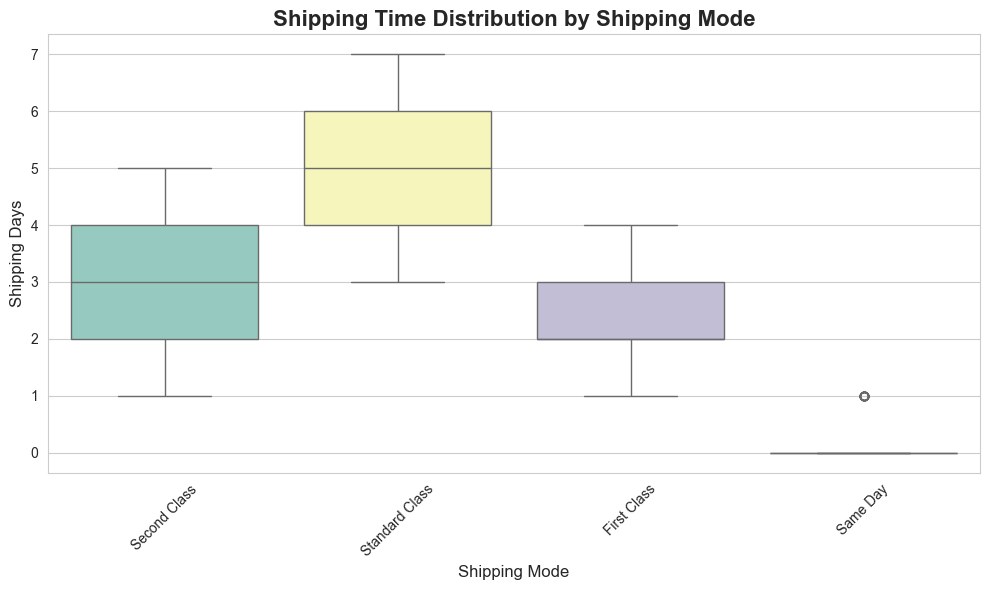

In [101]:
#calculate shipping time (days between order and ship date)
sales_df['Shipping_Days'] = (sales_df['Ship Date'] - sales_df['Order Date']).dt.days

# Average shipping time by shipping mode
avg_shipping_time = sales_df.groupby('Ship Mode')['Shipping_Days'].mean().sort_values()
print("Average Shipping Time by Shipping Mode (in days):")
print(avg_shipping_time)

# Visualize
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_df, x='Ship Mode', y='Shipping_Days', palette='Set3')
plt.title('Shipping Time Distribution by Shipping Mode', fontsize=16, fontweight='bold')
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Shipping Days', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Are there any patterns in shipping modes based on regions?

Shipping Mode Distribution by Region:
Ship Mode  First Class  Same Day  Second Class  Standard Class
Region                                                        
Central            292       118           447            1420
East               470       154           521            1640
South              232        83           325             958
West               507       183           609            1841


<Figure size 1200x600 with 0 Axes>

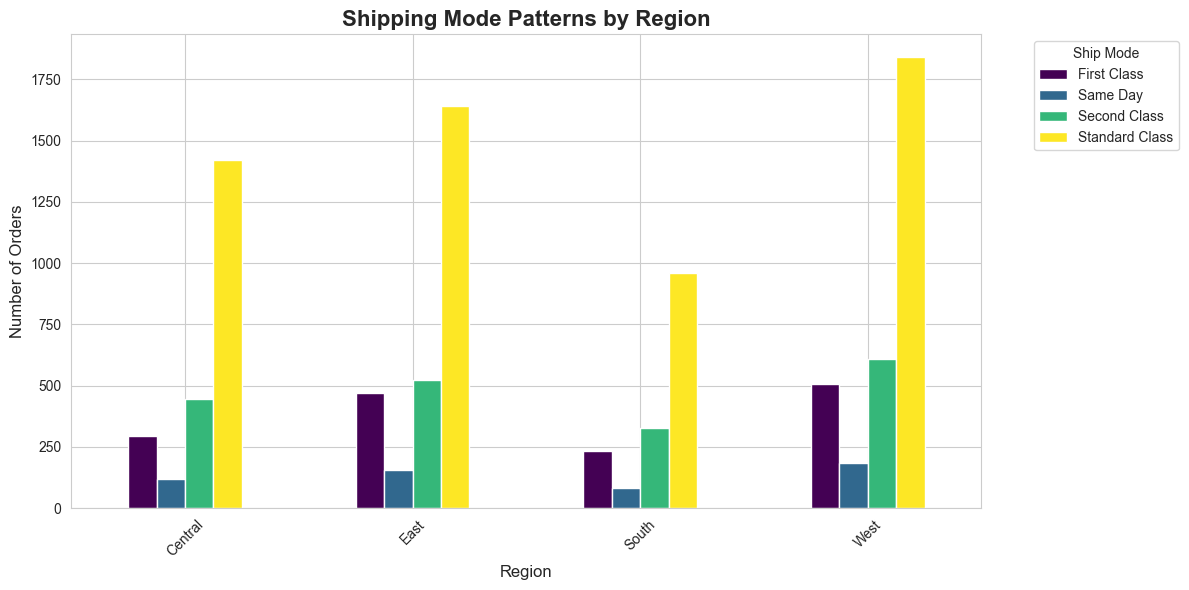

In [102]:
# Shipping mode patterns by region
shipping_region = pd.crosstab(sales_df['Region'], sales_df['Ship Mode'])
print("Shipping Mode Distribution by Region:")
print(shipping_region)

# Visualize
plt.figure(figsize=(12, 6))
shipping_region.plot(kind='bar', stacked=False, colormap='viridis', figsize=(12, 6))
plt.title('Shipping Mode Patterns by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Sales Distribution<h3>

1. What is the overall distribution of sales values?

In [103]:
print(f"Sales Statistics: {sales_df['Sales'].describe()}\n{sales_df['Sales'].sum()}")

Sales Statistics: count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64
2261536.7827000003


2. Are there any outliers in the sales data?

In [104]:
q1 = sales_df['Sales'].quantile(0.25)
q3 = sales_df['Sales'].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = sales_df[(sales_df['Sales'] < lower_bound) | (sales_df['Sales'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")
print(f"\nOutlier Range: Sales < ${lower_bound:.2f} or Sales > ${upper_bound:.2f}")
print(f"\nTop 10 Outliers (Highest Sales):")
print(outliers.nlargest(10, 'Sales')[['Product Name', 'Sales', 'Category']])

Number of Outliers: 1145

Outlier Range: Sales < $-272.79 or Sales > $500.64

Top 10 Outliers (Highest Sales):
                                           Product Name      Sales  \
2697  Cisco TelePresence System EX90 Videoconferenci...  22638.480   
6826              Canon imageCLASS 2200 Advanced Copier  17499.950   
8153              Canon imageCLASS 2200 Advanced Copier  13999.960   
2623              Canon imageCLASS 2200 Advanced Copier  11199.968   
4190              Canon imageCLASS 2200 Advanced Copier  10499.970   
9039   GBC Ibimaster 500 Manual ProClick Binding System   9892.740   
4098               Ibico EPK-21 Electric Binding System   9449.950   
4277   3D Systems Cube Printer, 2nd Generation, Magenta   9099.930   
8488  HP Designjet T520 Inkjet Large Format Printer ...   8749.950   
6425              Canon imageCLASS 2200 Advanced Copier   8399.976   

             Category  
2697       Technology  
6826       Technology  
8153       Technology  
2623       Technology 

3. Can you visualize the distribution of sales for each product category?

C:\Users\Hp\AppData\Local\Temp\ipykernel_9672\1106098827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sales_df, x='Category', y='Sales', palette='muted')


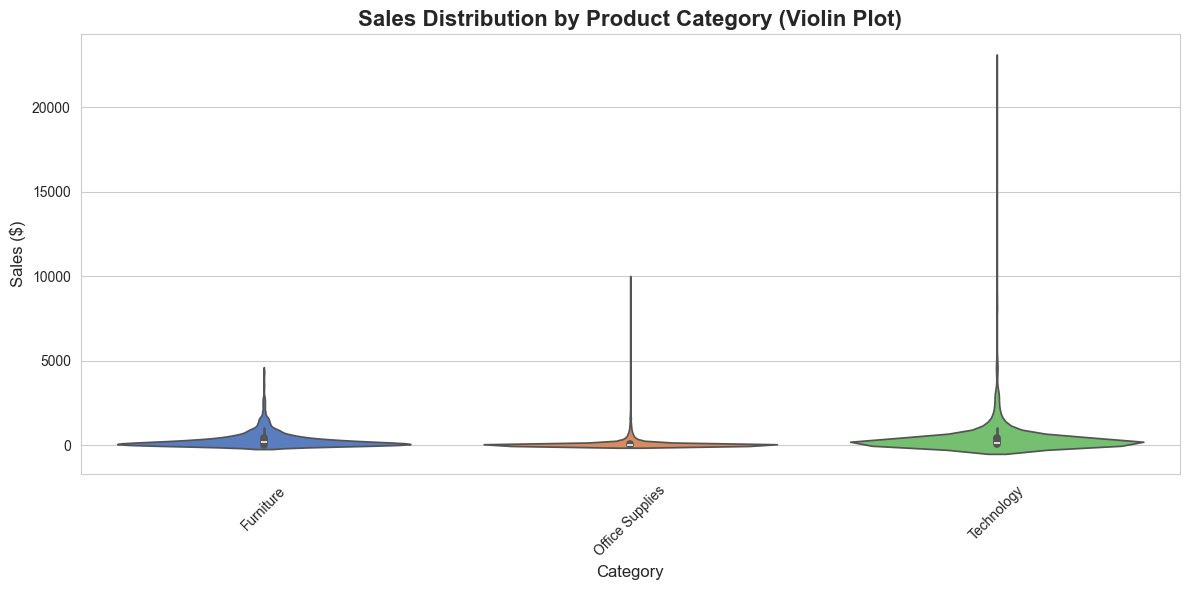

In [105]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=sales_df, x='Category', y='Sales', palette='muted')
plt.title('Sales Distribution by Product Category (Violin Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Profit Analysis<h3>

<h5> NOTE: This dataset does not contain a 'Profit' or 'Cost' column, so profit analysis cannot be performed directly. We would need additional information such as cost per item or profit margin percentage to calculate profit.<h5>